In [8]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np

In [2]:
vgg=VGG19(input_shape=[224,224]+[3],weights="imagenet",include_top=False)

In [3]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
for layer in vgg.layers:
    layer.trainable=False

In [5]:
final_arc=Model(inputs=vgg.input,outputs=Dense(10,activation="softmax")(Flatten()(vgg.output)))

In [6]:
final_arc.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
final_arc.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_augmen=ImageDataGenerator(rescale=1./255,rotation_range=40,shear_range=0.2,zoom_range=0.2,width_shift_range=0.3)
test_augmen=ImageDataGenerator(rescale=1./255)
#validation_augmen=ImageDataGenerator(rescale=1./255)

In [9]:
train_path="train"
test_path="test"
#valid_path="data/val"

In [10]:
final_data=train_augmen.flow_from_directory(train_path,target_size=(224,224),class_mode="categorical",batch_size=34)

Found 18345 images belonging to 10 classes.


In [11]:
final_test=test_augmen.flow_from_directory(test_path,target_size=(224,224))

Found 4585 images belonging to 10 classes.


In [12]:
vgg19=final_arc.fit_generator(final_data,epochs=50,steps_per_epoch=20,validation_data=final_test)

C:\Users\Varad Vanage\AppData\Local\Temp\ipykernel_1912\2630884418.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg19=final_arc.fit_generator(final_data,epochs=50,steps_per_epoch=20,validation_data=final_test)


Epoch 1/50
20/20 [==============================] - 1035s 54s/step - loss: 3.1846 - accuracy: 0.2147 - val_loss: 1.9044 - val_accuracy: 0.3204
Epoch 2/50
20/20 [==============================] - 881s 46s/step - loss: 1.8321 - accuracy: 0.3868 - val_loss: 1.5795 - val_accuracy: 0.4742
Epoch 3/50
20/20 [==============================] - 911s 48s/step - loss: 1.3826 - accuracy: 0.5265 - val_loss: 1.1882 - val_accuracy: 0.5980
Epoch 4/50
20/20 [==============================] - 953s 50s/step - loss: 1.3149 - accuracy: 0.5662 - val_loss: 1.1258 - val_accuracy: 0.6126
Epoch 5/50
20/20 [==============================] - 875s 46s/step - loss: 1.1817 - accuracy: 0.5926 - val_loss: 1.1627 - val_accuracy: 0.5926
Epoch 6/50
20/20 [==============================] - 860s 45s/step - loss: 1.1919 - accuracy: 0.5925 - val_loss: 0.9393 - val_accuracy: 0.6807
Epoch 7/50
20/20 [==============================] - 841s 44s/step - loss: 1.0131 - accuracy: 0.6456 - val_loss: 1.0198 - val_accuracy: 0.6473
Epoch

In [13]:
final_arc.save("vgg19.h5")

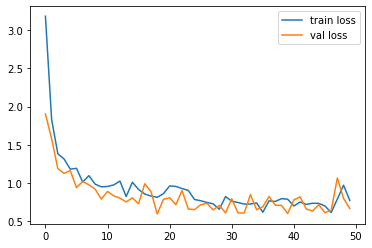

In [14]:
import matplotlib.pyplot as plt
plt.plot(vgg19.history["loss"],label="train loss")
plt.plot(vgg19.history["val_loss"],label="val loss")
plt.legend()
plt.show()

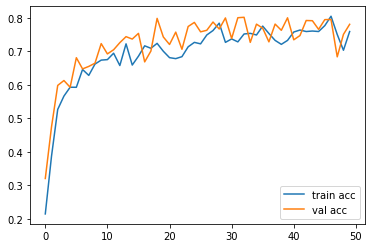

In [15]:
plt.plot(vgg19.history["accuracy"],label="train acc")
plt.plot(vgg19.history["val_accuracy"],label="val acc")
plt.legend()
plt.show()

In [3]:
import numpy as np
from tensorflow.keras.preprocessing import image
img=image.load_img("test/Tomato___Target_Spot/0adf2e61-79af-4129-aae0-f41f73b1725f___Com.G_TgS_FL 8275_newPixel25.JPG",target_size=(224,224))

In [4]:
image_array=image.img_to_array(img)
image_array=np.expand_dims(image_array/255,axis=0)

In [1]:
from tensorflow.keras.models import load_model

In [5]:
loaded_model=load_model("vgg19.h5")

In [6]:
ans=loaded_model.predict(image_array)

In [7]:
list=["Bacterial Spot","Early Blight","Healthy","Late Blight","Leaf Mold","Septoria Leaf Spot","Spider Mites Two Spotted Spirer Mite","Target Spot","Mosaic Virus","Yellow Leaf Curl Virus"]
list[np.argmax(ans)]

'Early Blight'